In [1]:
#Using Keras to Load the Datase
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [2]:
(X_train_f, y_train_f), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_f.shape,y_train_f.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train_f.dtype

dtype('uint8')

Moreover, since we are going to train the neural net‐
work using Gradient Descent, we must scale the input features. For simplicity, we just
scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also
converts them to floats):

In [5]:
#Note that the dataset is already split into a training set and a test set, but there is no
#validation set, so let’s create one.

X_valid, X_train = X_train_f[:5000] / 255.0, X_train_f[5000:] / 255.0
y_valid, y_train = y_train_f[:5000], y_train_f[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
 class_names[y_train[4]]

'Ankle boot'

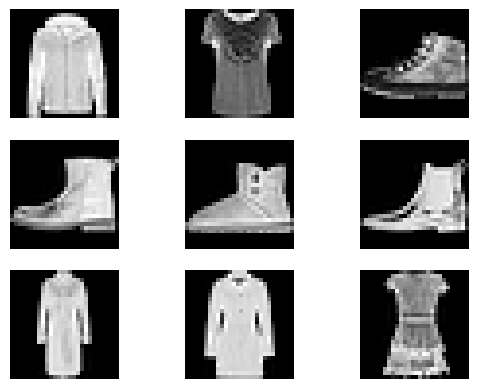

In [8]:
for i in range(9):
    img = X_train[i]

    plt.subplot(3, 3, i + 1) 
    plt.imshow(img, cmap='gray') 
    plt.axis('off')
plt.show()

#### Creating the Model Using the Sequential API

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.layers

In [19]:
model.layers[1].name

'dense_3'

In [20]:
 model.get_layer('dense_3').name

'dense_3'

In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 10s 5ms/step - loss: 0.7009 - accuracy: 0.7697 - val_loss: 0.5005 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4813 - accuracy: 0.8312 - val_loss: 0.4597 - val_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4373 - accuracy: 0.8464 - val_loss: 0.4185 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4119 - accuracy: 0.8551 - val_loss: 0.3923 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3899 - accuracy: 0.8618 - val_loss: 0.3801 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3752 - accuracy: 0.8679 - val_loss: 0.3706 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3617 - accuracy: 0.8710 - val_loss: 0.3764 - val_accura

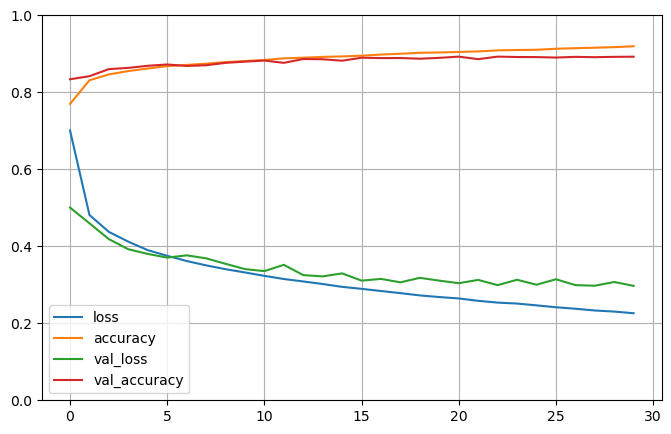

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
model.get_weights()

[array([[ 0.07123271,  0.03760073,  0.04839452, ...,  0.0130936 ,
          0.0263455 , -0.05359836],
        [-0.06409887, -0.03763659, -0.06550489, ...,  0.00929381,
          0.00095735, -0.00499809],
        [-0.03487957, -0.0136427 ,  0.00265297, ...,  0.03899488,
          0.00852387, -0.04653146],
        ...,
        [-0.04385828,  0.01050825,  0.0500801 , ...,  0.07115229,
         -0.00185678,  0.03917008],
        [-0.05248984,  0.03001033,  0.0540441 , ..., -0.0528939 ,
         -0.07496588,  0.03454709],
        [-0.02964919, -0.06313659,  0.0106448 , ..., -0.05387769,
          0.00952951, -0.06163438]], dtype=float32),
 array([-4.35950962e-04,  1.21540815e-01,  1.86696813e-01,  1.06140405e-01,
         1.31412849e-01,  1.28663510e-01,  9.75282118e-02,  2.75700949e-02,
         1.35111269e-02,  1.39082626e-01, -1.07229695e-01,  1.13796242e-01,
         9.65678245e-02,  1.95816085e-02, -2.56051924e-02,  2.24038903e-02,
         1.45282507e-01,  1.18993841e-01, -3.04631628e

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 68.7308 - accuracy: 0.8378


[68.73079681396484, 0.8378000259399414]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 219ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_pred = model.predict_on_batch(X_new)

In [38]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)